In [137]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/spx,vix,vvix,move,skew,shortvol.csv')
data.head()


,x,S&P 500 Index,CBOE S&P 500 Volatility Index,CBOE VIX Volatility Index,ICE BofAML Move Index,CBOE Skew Index,CBOE Short VIX Futures Index
0,2015-01-12T00:00:00,2028.260010,19.600000,109.040001,81.900002,121.089996,481.970001
1,2015-01-13T00:00:00,2023.030029,20.559999,109.220001,83.000000,122.199997,467.859985
2,2015-01-14T00:00:00,2011.270020,21.480000,113.500000,85.300003,132.660004,458.730011
3,2015-01-15T00:00:00,1992.670044,22.389999,117.070000,85.300003,120.769997,448.149994
4,2015-01-16T00:00:00,2019.420044,20.950001,111.320000,92.599998,131.389999,458.929993


## 1. Handling Missing Values

Given the time series nature of our data, we opt for forward filling, followed by backward filling if necessary.

In [138]:
# Apply forward fill
data.fillna(method='ffill', inplace=True)

# Apply backward fill for any remaining missing values
data.fillna(method='bfill', inplace=True)


## 2. Data Standardization
Before applying PCA, it's crucial to standardize the data.

In [139]:
from sklearn.preprocessing import StandardScaler

# Extract numerical features and standardize
features = data.columns[1:]
X = data[features]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


## 3. Applying PCA and Exploring Variance Explained

In [140]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA and extract explained variance
pca = PCA()
pca.fit(X_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


## 4. Visualization in Reduced PCA Space
Visualizing data using the first two principal components provides insight into its structure.

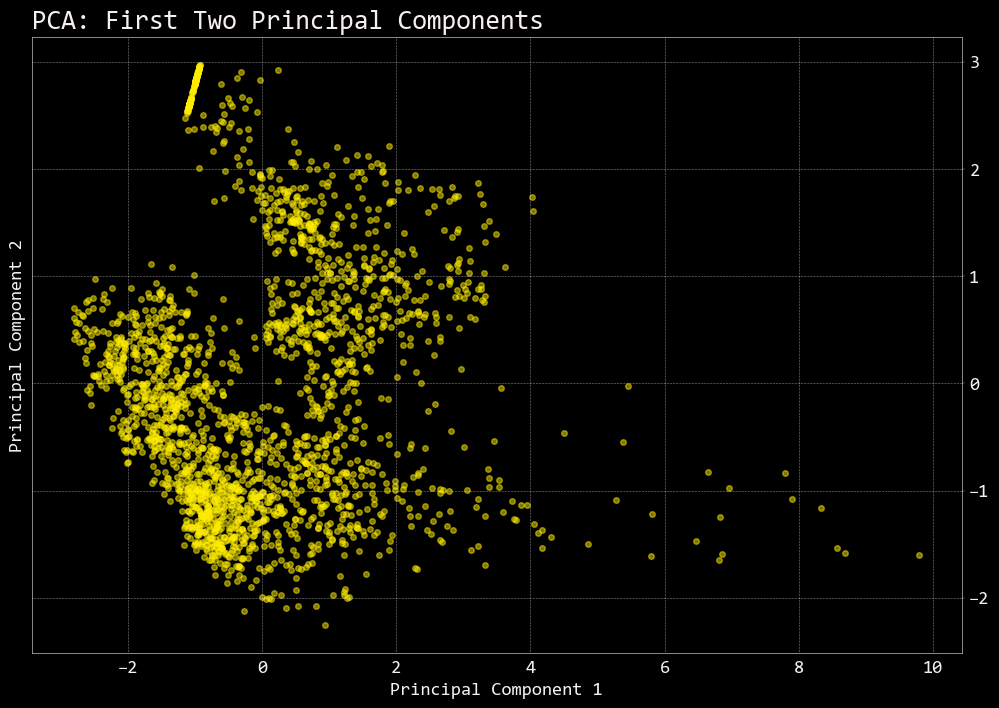

In [141]:
import matplotlib.pyplot as plt

# Project data onto the first two principal components
X_pca = pca.transform(X_standardized)[:, :2]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()


## 5. Examining Loadings to Understand Relationships
Loadings help us understand the relationship between the original indices and the principal components.

In [142]:
# Extract loadings for the first three principal components
loadings = pca.components_[:3]
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3'], index=features)
loadings_df


,PC1,PC2,PC3
S&P 500 Index,0.291124,0.684201,0.072439
CBOE S&P 500 Volatility Index,0.625275,-0.089264,-0.027050
CBOE VIX Volatility Index,0.491699,-0.039856,-0.498381
ICE BofAML Move Index,0.272129,0.366273,0.621963
CBOE Skew Index,-0.091105,0.475437,-0.597769
CBOE Short VIX Futures Index,-0.447387,0.402636,-0.038366
